<a href="https://colab.research.google.com/github/gilsonauerswald/Bioinformatic_Projects/blob/main/R_C2_L3_Advanced_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Welcome Back to R-Coding Course 2!**

In the previous lesson, we covered loading data, preprocessing, removing NA values, filtering low values, log transformation, and data visualization. We also explored learned the syntax for writing functions. If you haven't completed these topics, please refer to [L02 - Data Processing & visualization](https://learn.omicslogic.com/R-Code/r-coding-course-1-getting-started-with-bioinformatics/lesson/02-data-processing-and-visualization) before practicing the codes for this lesson.

# **Let's Recap!**

Now that we've covered essential concepts in [L03 - Advanced Data Visualization](https://learn.omicslogic.com/R-Code/r-coding-course-2-introduction-to-data-science-bioml/lesson/03-advanced-data-visualization), let's take a moment to reinforce what we've learned so far. We'll start with a brief recap of the codes and techniques we've explored in the lesson.

# **Lesson Code Breakdown**

### **1. Load Data:**

In [ ]:
# First, we will import our data and store it an an object or data frame(df)
df <- read.table('https://raw.githubusercontent.com/pine-bio-support/DataScience/main/Final_cell_lines_RNA-expression_FPKM_values_1000genes_with_NA.txt', sep ='\t', header = TRUE, row.names=1)
#write the first 10 rows of the dataset:
head(df)
# Check dimension of data (how many rows and columns)
dim(df)

,Non.malignant,Non.malignant.1,Non.malignant.2,Non.malignant.3,Non.malignant.4,Claudin.low,Claudin.low.1,Claudin.low.2,Claudin.low.3,Claudin.low.4,Claudin.low.5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000131746.11,373.26,333.98,474.49,303.75,465.48,0.10,0.10,0.23,0.09,0.05,0.92
ENSG00000065618.15,351.31,545.60,207.94,219.26,332.95,0.05,0.37,0.00,1.72,0.12,1.88
ENSG00000128422.14,1927.78,5882.94,3161.55,1722.58,6828.70,1.20,0.43,0.00,2.71,1.71,0.45
ENSG00000111319.11,385.27,247.23,148.99,123.84,139.87,0.09,2.25,0.23,1.82,1.03,2.63
ENSG00000189334.7,693.32,950.08,565.24,292.25,985.39,0.00,1.07,0.52,0.56,0.12,0.00
ENSG00000076826.8,9.26,11.65,6.87,6.91,10.06,0.24,0.44,0.12,0.89,0.93,0.05


[1] 1000   11


This R code imports a tab-separated dataset from a URL, stores it as a data frame named df, displays the first 10 rows to provide a snapshot of the data, and checks and prints the dimensions (number of rows and columns) of the dataset.

## **2. Check type of data:**

In [ ]:
# Check type of data
str(df)

'data.frame':	1000 obs. of  11 variables:
 $ Non.malignant  : num  373 351 1928 385 693 ...
 $ Non.malignant.1: num  334 546 5883 247 950 ...
 $ Non.malignant.2: num  474 208 3162 149 565 ...
 $ Non.malignant.3: num  304 219 1723 124 292 ...
 $ Non.malignant.4: num  465 333 6829 140 985 ...
 $ Claudin.low    : num  0.1 0.05 1.2 0.09 0 0.24 0.5 3.24 0.6 0.32 ...
 $ Claudin.low.1  : num  0.1 0.37 0.43 2.25 1.07 ...
 $ Claudin.low.2  : num  0.23 0 0 0.23 0.52 0.12 0.28 1.1 0.1 3.26 ...
 $ Claudin.low.3  : num  0.09 1.72 2.71 1.82 0.56 0.89 1.45 0.04 0.19 0.79 ...
 $ Claudin.low.4  : num  0.05 0.12 1.71 1.03 0.12 0.93 0.57 1.26 0.33 0.62 ...
 $ Claudin.low.5  : num  0.92 1.88 0.45 2.63 0 0.05 0.15 0.13 0.14 9.85 ...


This R code employs the str function to inspect and display the structure of the df data frame, revealing information about its type and the structure of its columns. This helps users understand the data types and formats present in the dataset.

## **3. Extract Sample names:**

In [ ]:
# Extract the sample names (column names)
Samples <- colnames(df)
print(Samples)

 [1] "Non.malignant"   "Non.malignant.1" "Non.malignant.2" "Non.malignant.3"
 [5] "Non.malignant.4" "Claudin.low"     "Claudin.low.1"   "Claudin.low.2"  
 [9] "Claudin.low.3"   "Claudin.low.4"   "Claudin.low.5"  



This R code employs the colnames function to extract the column names (sample names) from the df data frame. The resulting names are stored in the object named Samples. Subsequently, the print function is used to display the extracted sample names. This code offers a concise method for retrieving and showcasing the column names in the dataset.

## **4. Extract feature names (gene ids):**

In [ ]:
#we can extract row ids from data
Genes  <- rownames(df)
print(Genes)

   [1] "ENSG00000131746.11" "ENSG00000065618.15" "ENSG00000128422.14"
   [4] "ENSG00000111319.11" "ENSG00000189334.7"  "ENSG00000076826.8" 
   [7] "ENSG00000137699.15" "ENSG00000053747.14" "ENSG00000205420.9" 
  [10] "ENSG00000132470.12" "ENSG00000039068.17" "ENSG00000148671.12"
  [13] "ENSG00000103067.10" "ENSG00000130545.14" "ENSG00000159166.12"
  [16] "ENSG00000271447.4"  "ENSG00000188910.7"  "ENSG00000115112.7" 
  [19] "ENSG00000197565.14" "ENSG00000166145.13" "ENSG00000265190.5" 
  [22] "ENSG00000189280.3"  "ENSG00000142675.16" "ENSG00000173801.15"
  [25] "ENSG00000021762.18" "ENSG00000102890.13" "ENSG00000276850.3" 
  [28] "ENSG00000206075.12" "ENSG00000113430.8"  "ENSG00000163220.10"
  [31] "ENSG00000163362.9"  "ENSG00000237289.8"  "ENSG00000273760.1" 
  [34] "ENSG00000148344.10" "ENSG00000152939.13" "ENSG00000129194.6" 
  [37] "ENSG00000179148.8"  "ENSG00000186493.10" "ENSG00000114541.13"
  [40] "ENSG00000138271.5"  "ENSG00000014216.14" "ENSG00000241484.8" 
  [43] "ENSG00000196


This R code utilizes the rownames function to extract the row identifiers (gene names) from the df data frame. The resulting gene names are stored in the object named Genes. The print function is then employed to display the extracted gene names. This code provides a straightforward approach to obtaining and showcasing the row identifiers in the dataset.

## **5. Remove NA values:**

In [ ]:
# remove NA values
df1 <-  na.exclude(df)
# To check the dimension of data
dim(df1)

[1] 992  11

This R code creates a new data frame, df1, by excluding rows with missing values (NA) from the original data frame df using the na.exclude function. The dim function is then used to check and print the dimensions of the resulting data frame df1, indicating the number of rows and columns after removing NA values.

## **6. Descriptive Statistics and Visualization:**

### **6.1 Descriptive Statistics:**

In [ ]:
# Descriptive statistics, i.e., compute the summary statistics of data
summ <- summary(df1)
# print summary statistics
print(summ)
# Write summary statistics of data  into a file and export it
write.table(summ, file="stat_sum-FPKM-data.txt", col.names=TRUE, sep="\t")

 Non.malignant      Non.malignant.1    Non.malignant.2    Non.malignant.3   
 Min.   :   0.000   Min.   :   0.000   Min.   :   0.000   Min.   :   0.000  
 1st Qu.:   2.595   1st Qu.:   2.255   1st Qu.:   2.395   1st Qu.:   2.435  
 Median :  11.680   Median :  11.550   Median :   9.735   Median :  10.010  
 Mean   :  99.257   Mean   : 117.687   Mean   :  93.093   Mean   :  94.968  
 3rd Qu.:  38.862   3rd Qu.:  46.255   3rd Qu.:  35.763   3rd Qu.:  38.117  
 Max.   :6942.940   Max.   :7372.090   Max.   :6829.820   Max.   :3992.720  
 Non.malignant.4     Claudin.low      Claudin.low.1      Claudin.low.2     
 Min.   :   0.000   Min.   :   0.00   Min.   :   0.000   Min.   :   0.000  
 1st Qu.:   2.197   1st Qu.:   0.41   1st Qu.:   0.770   1st Qu.:   0.950  
 Median :   9.805   Median :   3.69   Median :   4.405   Median :   4.465  
 Mean   : 127.141   Mean   :  38.84   Mean   :  38.306   Mean   :  35.005  
 3rd Qu.:  37.510   3rd Qu.:  16.32   3rd Qu.:  17.795   3rd Qu.:  18.012  
 Max.


This R code calculates descriptive statistics for the data frame df1 using the summary function and stores the results in the object named summ. The print function is then used to display the computed summary statistics. Additionally, the write.table function is employed to export the summary statistics into a tab-separated file named "stat_sum-FPKM-data.txt", including column names in the output. This code provides a concise way to both view and export summary statistics for the dataset.

### **6.2 Box Plot:**

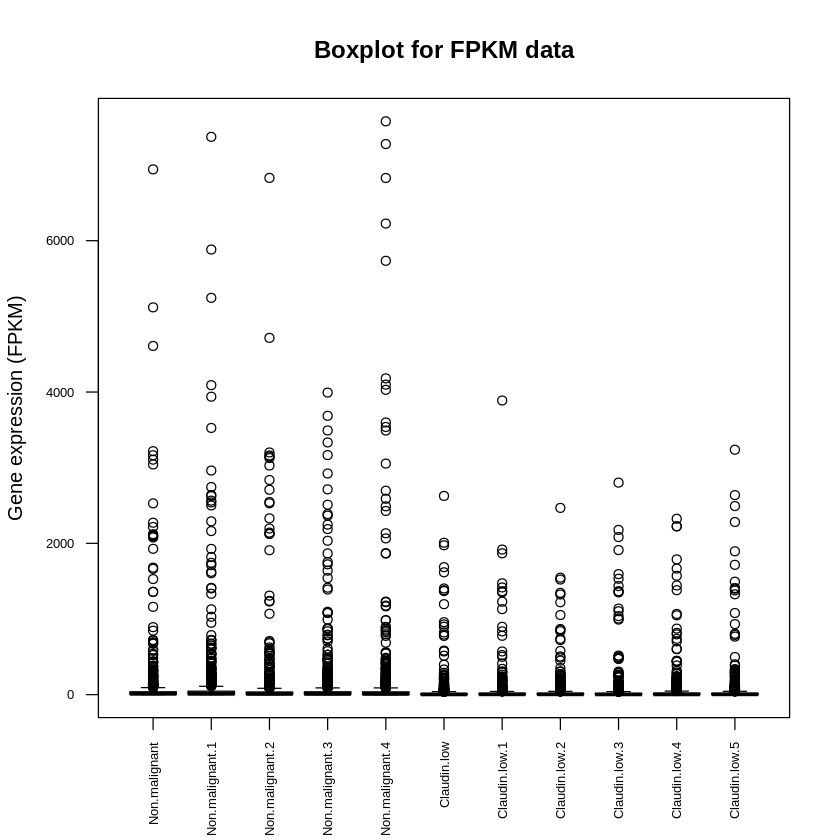

In [ ]:
# Generate a boxplot with different colors for each sample
boxplot(df1,
        main = "Boxplot for FPKM data",
        xlab = "",
        ylab = "Gene expression (FPKM)",
        col = rainbow(ncol(df1)),   # one unique color per column (sample)
        las = 2,
        cex.axis = 0.65)



This R code generates a boxplot for all samples in the df1 data frame (containing FPKM values) using the boxplot function. The first line produces a basic boxplot, while the second line enhances it by adding a main title ("Boxplot for FPKM data"), axis titles ("Gene expression (FPKM)"), setting the boxplot color to red (col="red"), rotating axis labels (las=2), and adjusting the axis label font size (cex.axis = 0.65). These commands collectively create an informative and visually appealing boxplot for the FPKM data.

## **7. Log transformation:**

In [ ]:
log_df <- log(df1+1)
#Check the dimension of data
dim(log_df)

[1] 992  11


This R code transforms the values in the df1 data frame by taking the natural logarithm of each element plus 1, and stores the result in a new data frame named log_df. The log function is applied to each element to perform the logarithmic transformation. The dim function is then used to check and print the dimensions of the transformed data frame log_df, indicating the number of rows and columns.

## **8. Descriptive Statistics of transformed data**

In [ ]:
# let’s check the summary statistics of data after log transformation
summ_log <- summary(log_df)
# Print summary statistics of data
summ_log
# Write summary statistics to a file and export it
write.table(summ_log, file="stat_sum-log-data.txt", col.names=TRUE, sep="\t")

 Non.malignant   Non.malignant.1 Non.malignant.2 Non.malignant.3
 Min.   :0.000   Min.   :0.000   Min.   :0.000   Min.   :0.000  
 1st Qu.:1.280   1st Qu.:1.180   1st Qu.:1.222   1st Qu.:1.234  
 Median :2.540   Median :2.530   Median :2.374   Median :2.399  
 Mean   :2.629   Mean   :2.658   Mean   :2.529   Mean   :2.583  
 3rd Qu.:3.685   3rd Qu.:3.856   3rd Qu.:3.604   3rd Qu.:3.667  
 Max.   :8.846   Max.   :8.906   Max.   :8.829   Max.   :8.292  
 Non.malignant.4  Claudin.low     Claudin.low.1   Claudin.low.2   
 Min.   :0.000   Min.   :0.0000   Min.   :0.000   Min.   :0.0000  
 1st Qu.:1.162   1st Qu.:0.3436   1st Qu.:0.571   1st Qu.:0.6678  
 Median :2.380   Median :1.5454   Median :1.687   Median :1.6984  
 Mean   :2.563   Mean   :1.8040   Mean   :1.923   Mean   :1.9423  
 3rd Qu.:3.651   3rd Qu.:2.8520   3rd Qu.:2.934   3rd Qu.:2.9451  
 Max.   :8.933   Max.   :7.8738   Max.   :8.266   Max.   :7.8118  
 Claudin.low.3    Claudin.low.4    Claudin.low.5   
 Min.   :0.0000   Min.  

This R code calculates and prints summary statistics for the log_df data frame, which contains the log-transformed FPKM values. The results are stored in the summ_log object. Additionally, the code exports the summary statistics into a tab-separated file named "stat_sum-log-data.txt," including column names in the output.

## **9. Boxplot for transformed data**

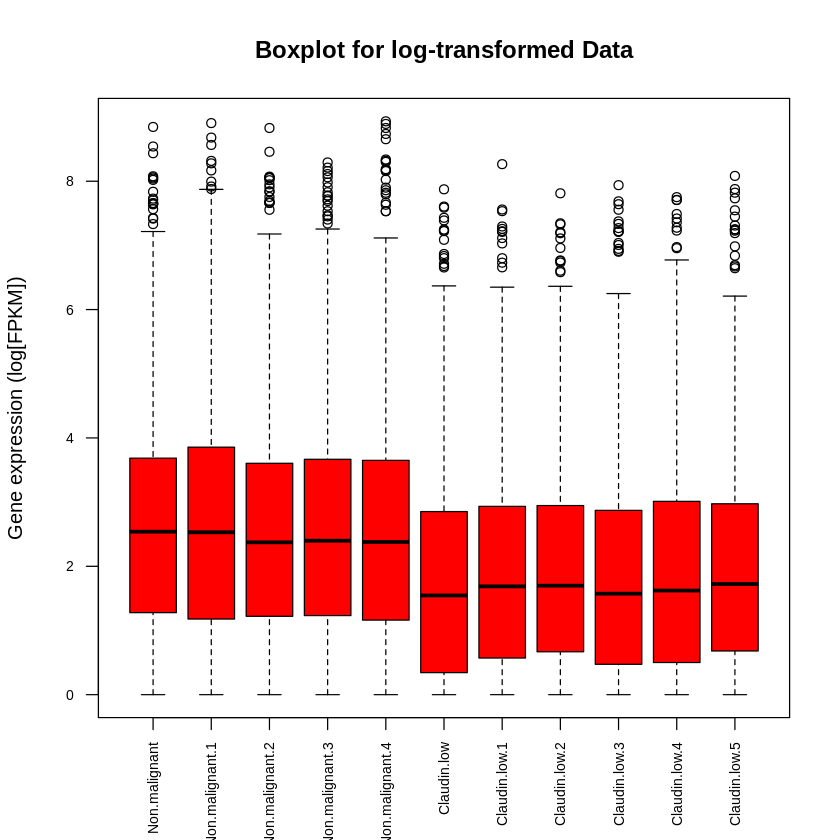

In [ ]:
# Draw boxplot for all samples (for FPKM values)
boxplot(log_df, main="Boxplot for log-transformed Data", xlab="", ylab="Gene expression (log[FPKM])", col="red", las=2, cex.axis = 0.7)

## **10. Boxplot for groups of samples**

### **10.1. Extract the specific samples from the data with their name**

In [ ]:
# Extract specific samples from data with their name
Non_ML1 <- as.data.frame(log_df[grep('^Non.malignant', names(log_df))])
Claudin1 <- as.data.frame(log_df[grep('^Claudin', names(log_df))])

In this R code, specific samples are extracted from the log_df data frame based on their column names. Two new data frames, Non_ML1 and Claudin1, are created using the grep function to match column names that start with "Non.malignant" and "Claudin," respectively. The as.data.frame function is used to convert the extracted columns into separate data frames.

This code allows you to isolate and work with subsets of the log-transformed FPKM data corresponding to specific sample groups identified by their column names.

### **10.2. Compute the mean for each gene within each group**


In [ ]:
#Compute the mean for each gene within each group
Non_ML<- rowMeans(Non_ML1)
Claudin <- rowMeans(Claudin1)


This R code calculates the mean expression value for each gene within the specified groups. The rowMeans function is applied to the data frames Non_ML1 and Claudin1, representing the "Non_Malignant" and "Claudin" groups, respectively. The resulting vectors Non_ML and Claudin store the mean expression values for each gene within their respective groups. This allows for a group-wise assessment of gene expression patterns based on the extracted samples.

### **10.3. Bind groups together into 2 columns**


In [ ]:
#Bind groups together into 2 columns
group <- cbind(Non_ML, Claudin)


This R code uses the cbind function to bind together the vectors Non_ML and Claudin into a new data frame or matrix named group. The resulting structure has two columns, one for the mean expression values of genes within the "Non_Malignant" group (Non_ML) and the other for the mean expression values within the "Claudin" group (Claudin). This arrangement facilitates a side-by-side comparison of the mean expression values between the two specified groups.

### **10.4. Provide the column names to both groups**


In [ ]:
#Provide the column names to both groups
colnames(group) <- c("Non-malignant", "Claudin-low")

This R code assigns column names "Non-malignant" and "Claudin-low" to the group data frame, providing clear identification for the respective groups represented by each column. This improves the interpretability of the data during subsequent analysis.

### **10.5. Boxplot**


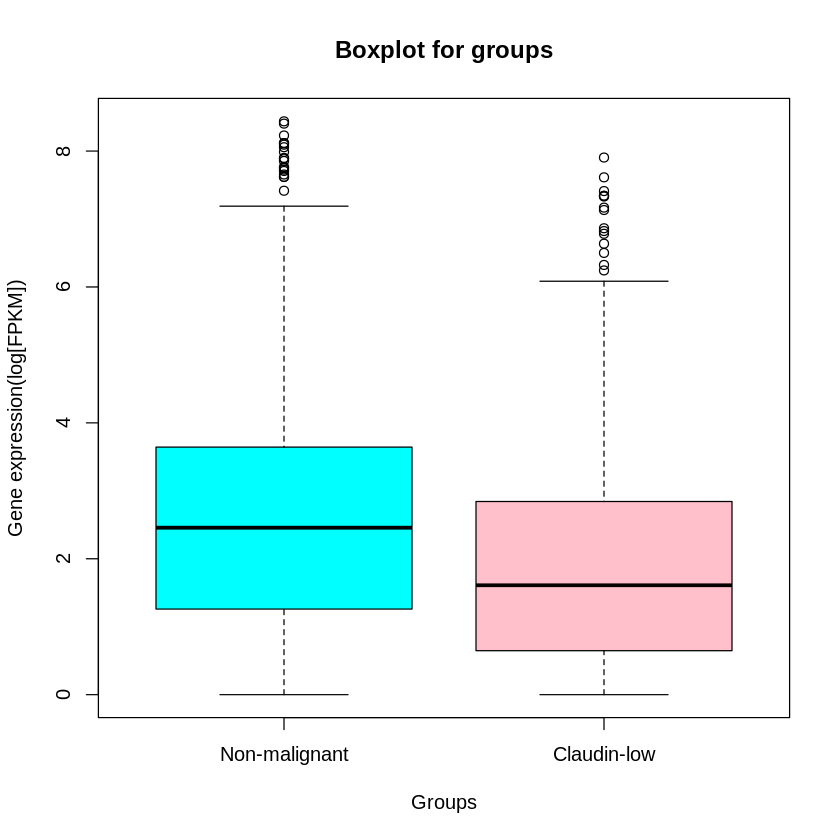

In [ ]:
#Draw boxplot for groups of samples
boxplot(group, main="Boxplot for groups", xlab="Groups", ylab="Gene expression(log[FPKM])", col=c('cyan', 'pink'))

This R code generates a boxplot for the group data frame, which contains mean expression values for the "Non-malignant" and "Claudin-low" groups. The boxplot function is used with appropriate labels and formatting options. The resulting plot is titled "Boxplot for groups" and displays gene expression levels on the y-axis (log[FPKM]) for the specified groups, with distinct colors ('cyan' for "Non-malignant" and 'pink' for "Claudin-low").

## **11. Scatter Plot**

### **11.1. Scatterplot between 2 samples (with FPKM values) in the same condition:**

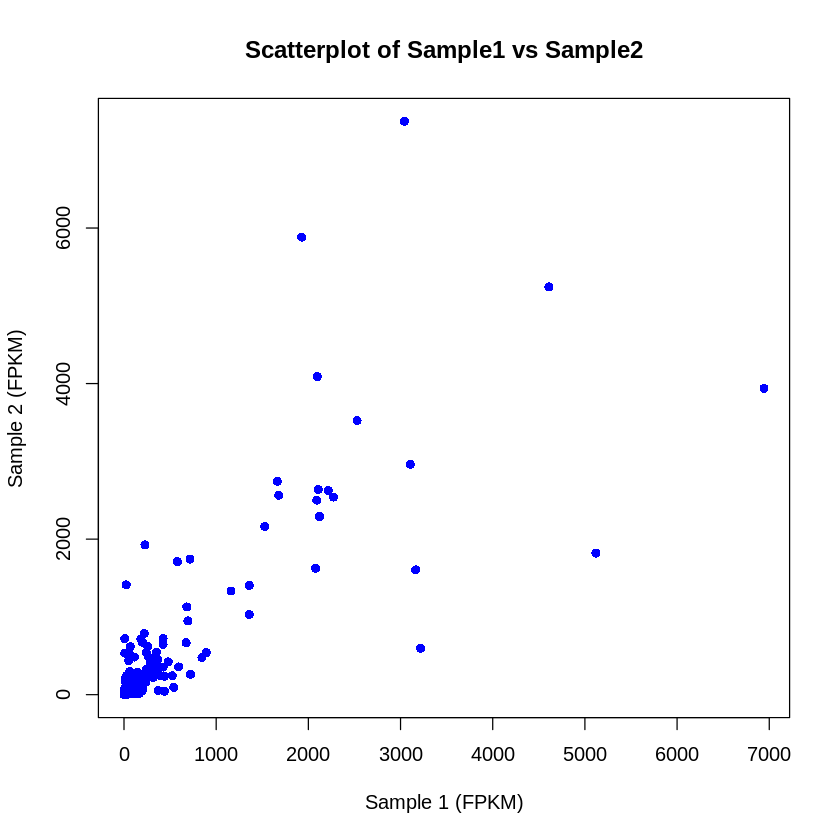

In [ ]:
# Extract samples of same group
sample1 <- df1[,1]
sample2 <- df1[,2]
# Combine them column-wise
s1_2 <- cbind(sample1,sample2)
# Draw Scatterplot
plot(s1_2,
     main = "Scatterplot of Sample1 vs Sample2",
     xlab = "Sample 1 (FPKM)",
     ylab = "Sample 2 (FPKM)",
      col = "blue", pch = 16)



This R code first extracts two samples, sample1 and sample2, from the df1 data frame, representing columns 1 and 2, respectively. Then, it combines these samples column-wise into a new data frame named s1_2 using the cbind function. Finally, a scatterplot is generated using the plot function to visualize the relationship between the expression values of the two samples.

### **11.2. Scatterplot between 2 samples (with FPKM values) from different conditions:**

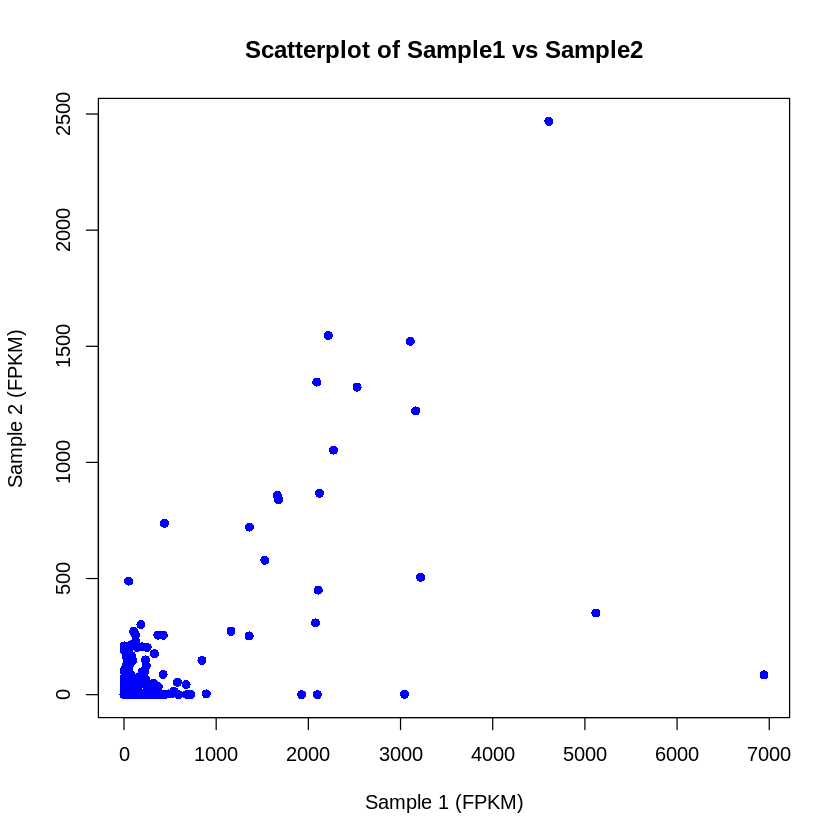

In [ ]:
# Extract samples of different groups
sample3 <- df1[,1]
sample4 <- df1[,8]
# Combine them column-wise
s3_4 <- cbind(sample3,sample4)
# Draw Scatterplot
plot(s3_4,
     main = "Scatterplot of Sample1 vs Sample2",
     xlab = "Sample 1 (FPKM)",
     ylab = "Sample 2 (FPKM)",
      col = "blue", pch = 16)


This R code extracts two samples, sample3 and sample4, from the df1 data frame, representing columns 1 and 8, respectively. Subsequently, it combines these samples column-wise into a new data frame named s3_4 using the cbind function. Finally, a scatterplot is generated using the plot function to visualize the relationship between the expression values of the two samples from different groups.

### **11.3. Scatterplot between 2 samples (with log-scale transformed values) in the same condition:**

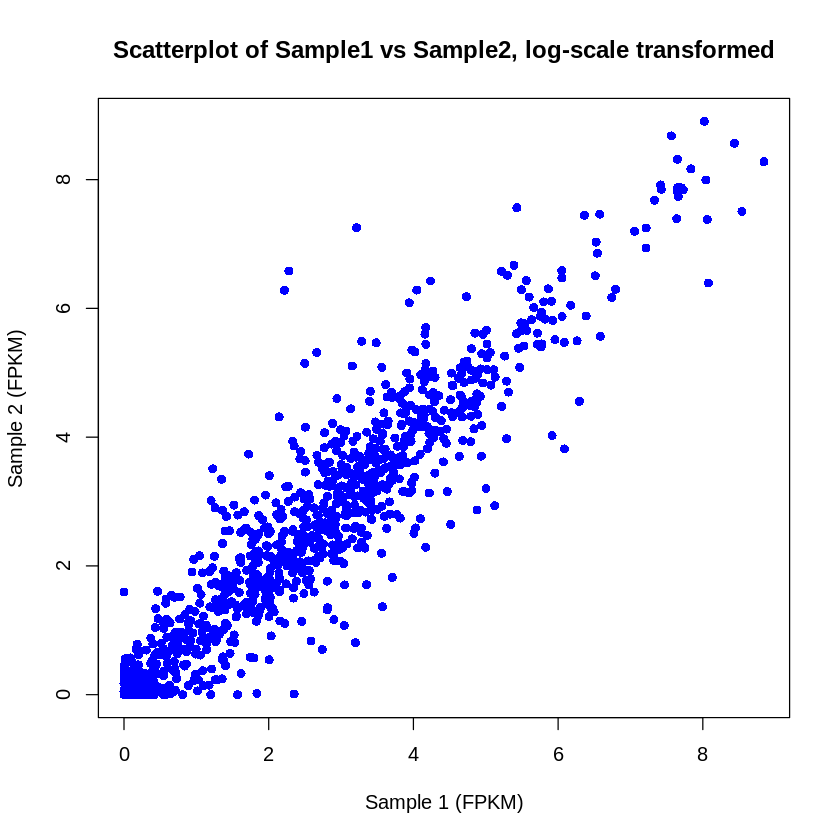

In [ ]:
# Extract samples of same group
sample1 <- log_df[,1]
sample2 <- log_df[,2]
# Combine them column-wise
s1_2 <- cbind(sample1,sample2)
# Draw Scatter Plot
plot(s1_2,
     main = "Scatterplot of Sample1 vs Sample2, log-scale transformed",
     xlab = "Sample 1 (FPKM)",
     ylab = "Sample 2 (FPKM)",
      col = "blue", pch = 16)


This R code extracts two samples, sample1 and sample2, from the log_df data frame (containing log-transformed FPKM values), representing columns 1 and 2, respectively. It then combines these samples column-wise into a new data frame named s1_2 using the cbind function. Finally, a scatter plot is generated using the plot function to visualize the relationship between the log-transformed expression values of the two samples.

### **11.4. Scatterplot between 2 samples (having log-scale transformed values) from different conditions:**

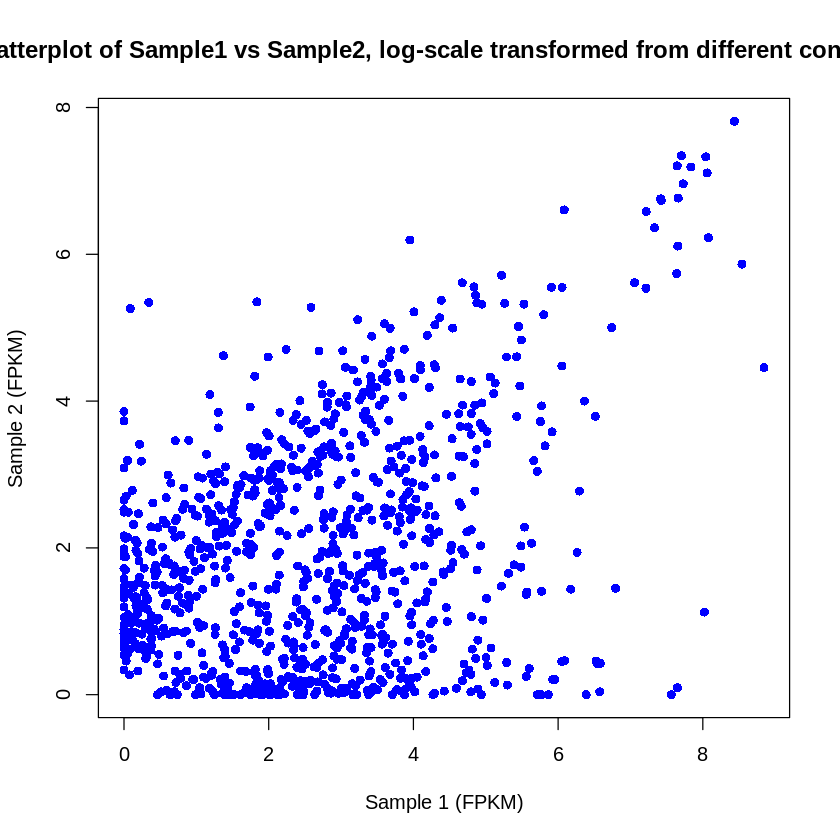

In [ ]:
# Extract samples of different groups
sample3 <- log_df[,1]
sample4 <- log_df[,8]
# Combine them column-wise
s3_4 <- cbind(sample3,sample4)
# Draw Scatter Plot
plot(s3_4,   main = "Scatterplot of Sample1 vs Sample2, log-scale transformed from different conditions",
     xlab = "Sample 1 (FPKM)",
     ylab = "Sample 2 (FPKM)",
      col = "blue", pch = 16)


This R code extracts two samples, sample3 and sample4, from the log_df data frame (containing log-transformed FPKM values), representing columns 1 and 8, respectively. It then combines these samples column-wise into a new data frame named s3_4 using the cbind function. Finally, a scatter plot is generated using the plot function to visualize the relationship between the log-transformed expression values of the two samples from different groups.

### **11.5. Scatterplot for RNA expression data containing FPKM values:**

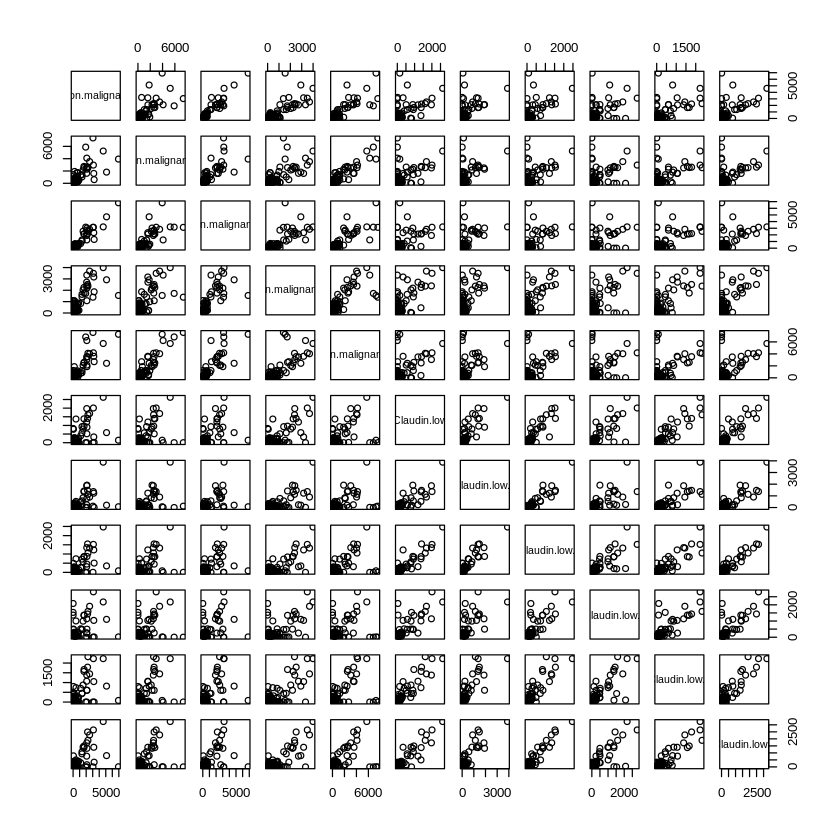

In [ ]:
# draw scatter plot for whole data (with FPKM values)
plot(df1)

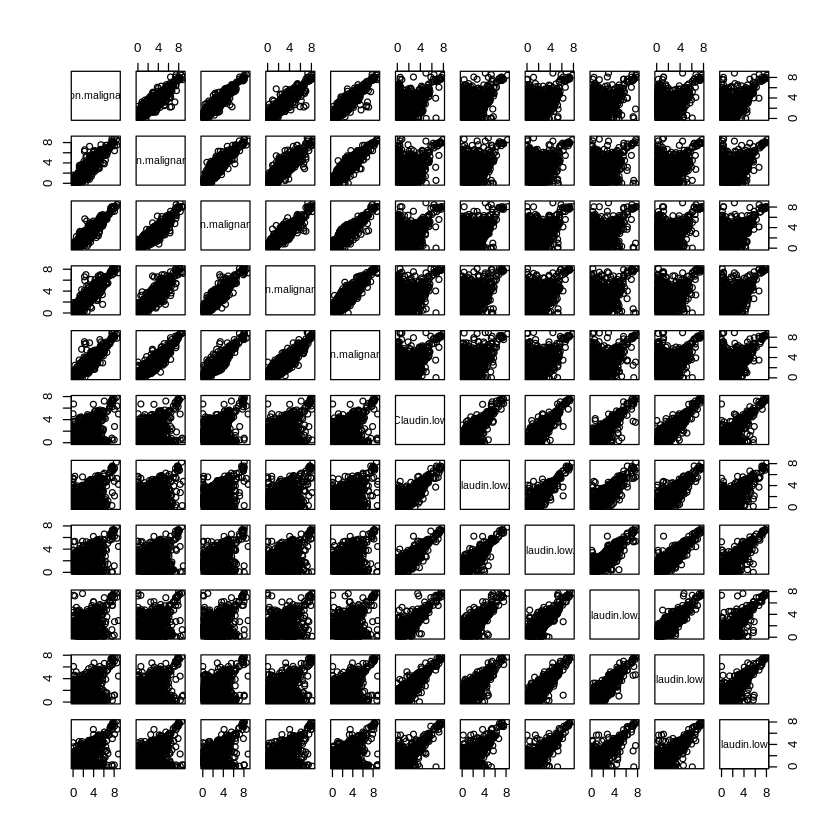

In [ ]:
# Scatter Plot for log transformed data
plot(log_df)

## **12. Barplot of one sample**

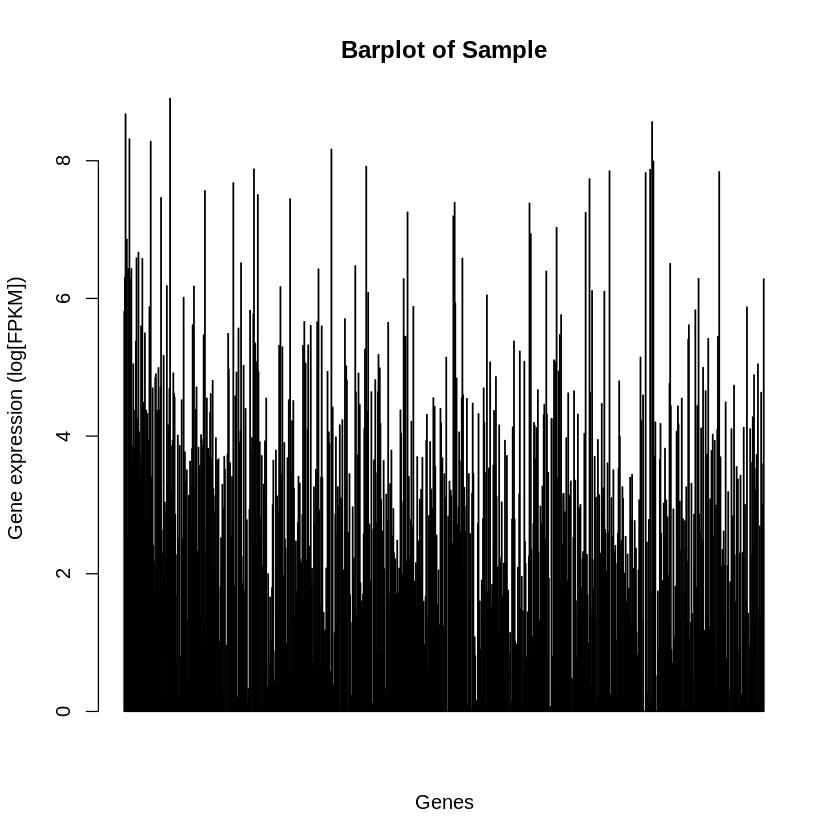

In [ ]:
# Take the 2nd sample
sample1 <- log_df[,2]
#Make a bar plot
barplot(sample1, main="Barplot of Sample", xlab="Genes", ylab="Gene expression (log[FPKM])")


This R code extracts the second sample (sample1) from the log_df data frame (containing log-transformed FPKM values) and creates a bar plot using the barplot function. The main title is set to "Barplot of Sample," with the x-axis labeled as "Genes" and the y-axis labeled as "Gene expression (log[FPKM])." This visualization provides a representation of gene expression levels for the selected sample.

### **12.1. Barplot of one sample for first 20 genes**

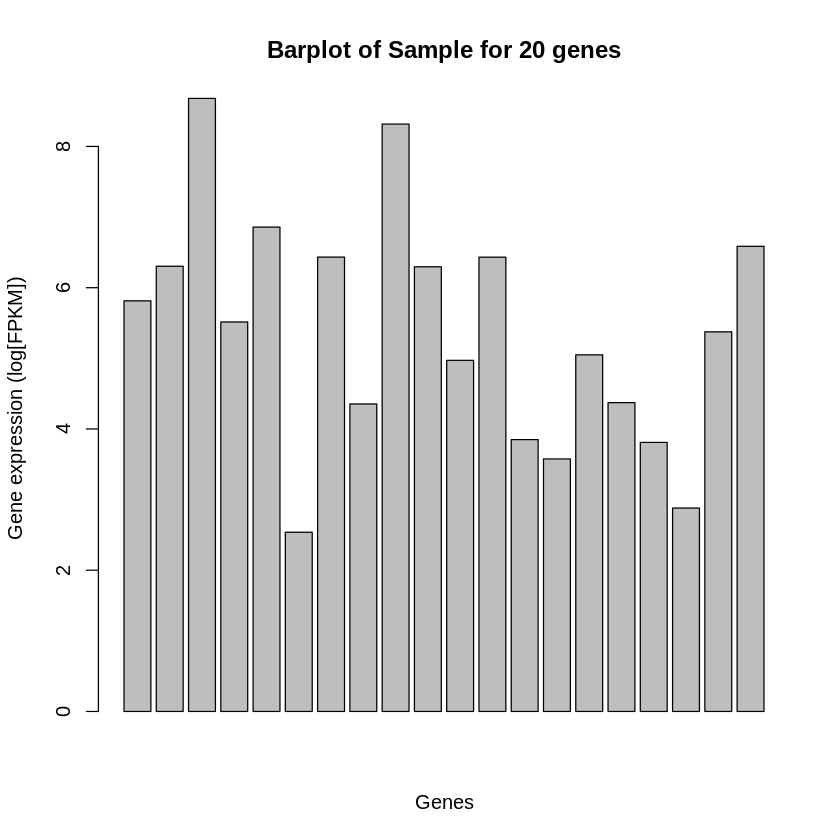

In [ ]:
# Extract 2nd sample with first 20 genes
sample_20genes <- log_df[1:20,2]
# Draw barplot
barplot(sample_20genes,  main="Barplot of Sample for 20 genes", xlab="Genes", ylab="Gene expression (log[FPKM])")


This R code extracts the second sample's expression values for the first 20 genes from the log_df data frame (containing log-transformed FPKM values). It then creates a bar plot using the barplot function, with the main title set to "Barplot of Sample for 20 genes," the x-axis labeled as "Genes," and the y-axis labeled as "Gene expression (log[FPKM])." This visualization focuses on the expression levels of the selected sample for a subset of genes.

### **12.2. Add colors to the barplot**

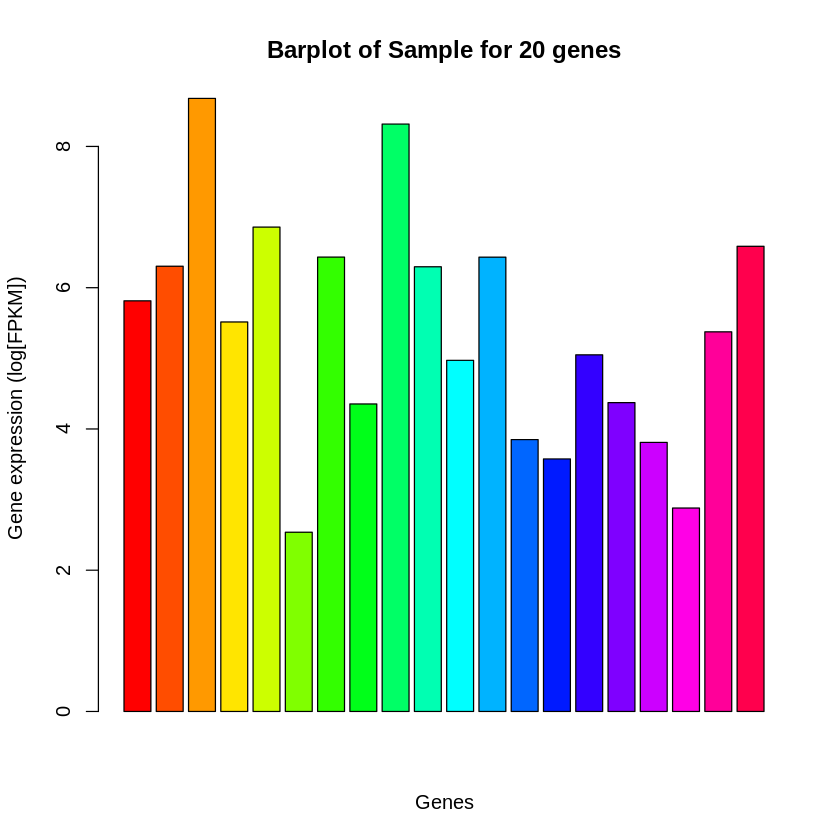

In [ ]:
# Add colors to the barplot
barplot(sample_20genes,  main="Barplot of Sample for 20 genes", xlab="Genes", ylab="Gene expression (log[FPKM])", col = rainbow(length(sample_20genes)))


This R code enhances the previous bar plot by adding colors to each bar. The col parameter in the barplot function is set to rainbow(length(sample_20genes)), which assigns a different color to each bar based on the number of genes in the sample. This creates a visually appealing bar plot with distinct colors for each gene's expression level in the selected sample.

### **12.3 Bar plot of specific gene in different samples.**

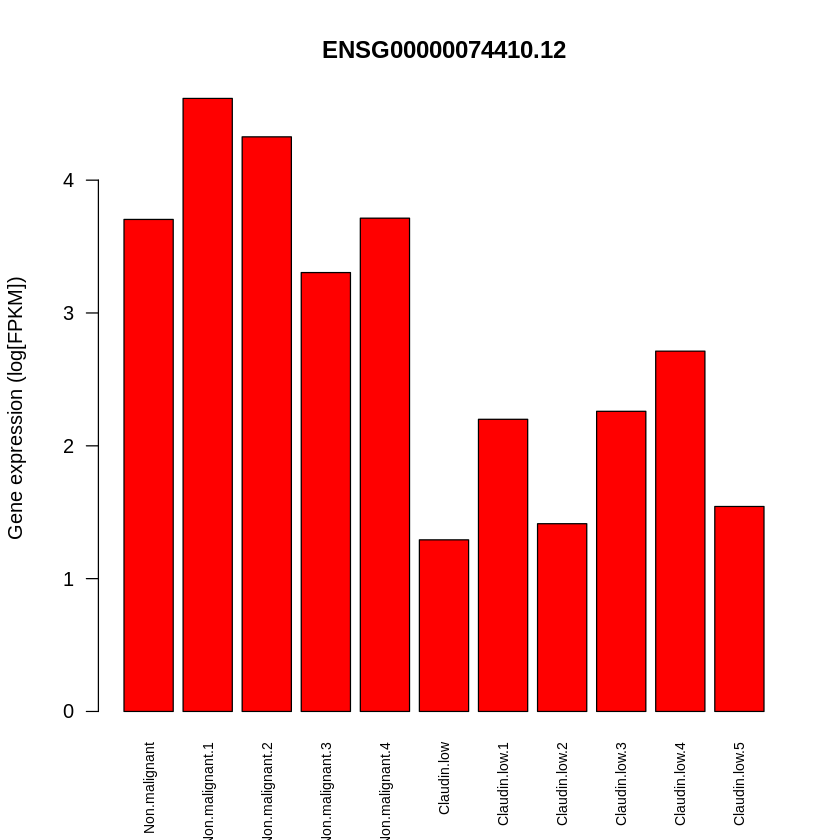

In [ ]:
# Extract 135th gene from the data
gene_135 <- log_df[135,]
# Convert this data frame into a matrix
gene_135_m <- as.matrix(gene_135)
# Extract gene ids list from the data
Genes  <- rownames(log_df)
# Extract the gene id for 135th gene from list
gene_id <- Genes[135]
# Draw barplot for the selected gene
barplot(gene_135_m,  main= gene_id, xlab="", ylab="Gene expression (log[FPKM])", las = 2, cex.names = 0.7, col = "red")

This R code extracts the expression values for the 135th gene (gene_135) from the log_df data frame (containing log-transformed FPKM values). It then converts the data frame into a matrix (gene_135_m). Additionally, it extracts the list of gene IDs from the data and specifically identifies the gene ID for the 135th gene (gene_id). Finally, a bar plot is generated for the selected gene using the barplot function, with the main title set to the gene ID, the x-axis label omitted (xlab=""), the y-axis labeled as "Gene expression (log[FPKM])," text on the x-axis labels rotated (las=2), and reduced font size for the x-axis labels (cex.names=0.7). The bars are colored red (col="red") for better visibility.

## **13. Histogram**

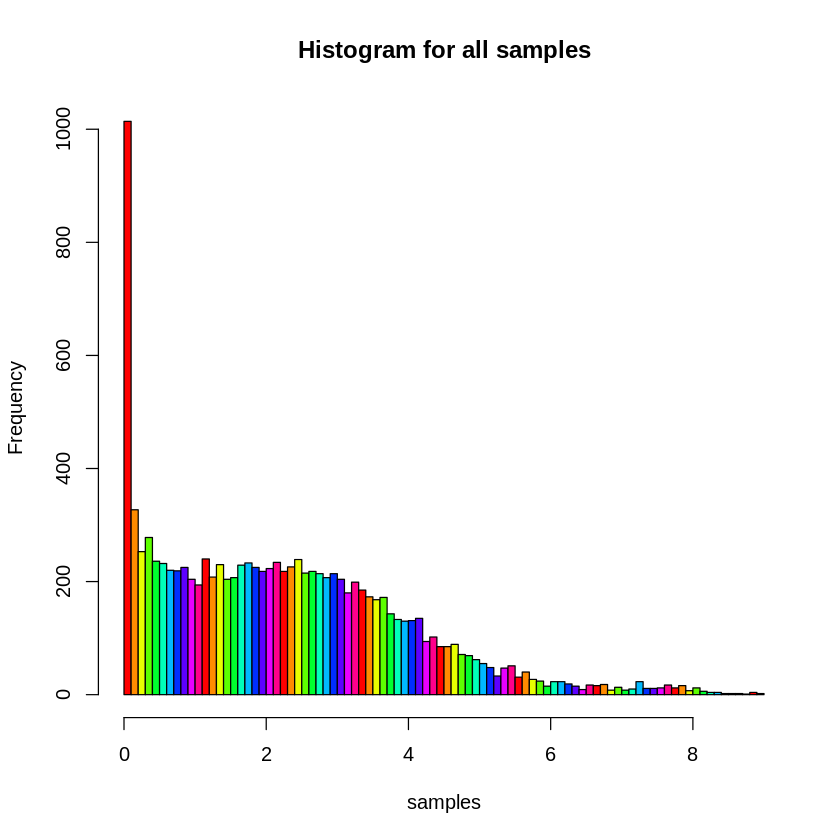

In [ ]:
#Convert dataframe (with log values) into a matrix
log_df1 <- as.matrix(log_df)
#Draw histogram, breaks represents the bins
hist(log_df1,  main= "Histogram for all samples" , xlab= "samples" , breaks= 80 , col=rainbow( 11 ))


This R code converts the data frame log_df with log-transformed values into a matrix (log_df1). It then draws a histogram using the hist function, with the main title set to "Histogram for all samples," x-axis labeled as "samples," and 80 breaks (bins) specified. The col parameter is set to rainbow(11) to assign a different color to each sample, providing visual distinction in the histogram for all samples.

### **13.1. Histogram of Non-malignant samples**

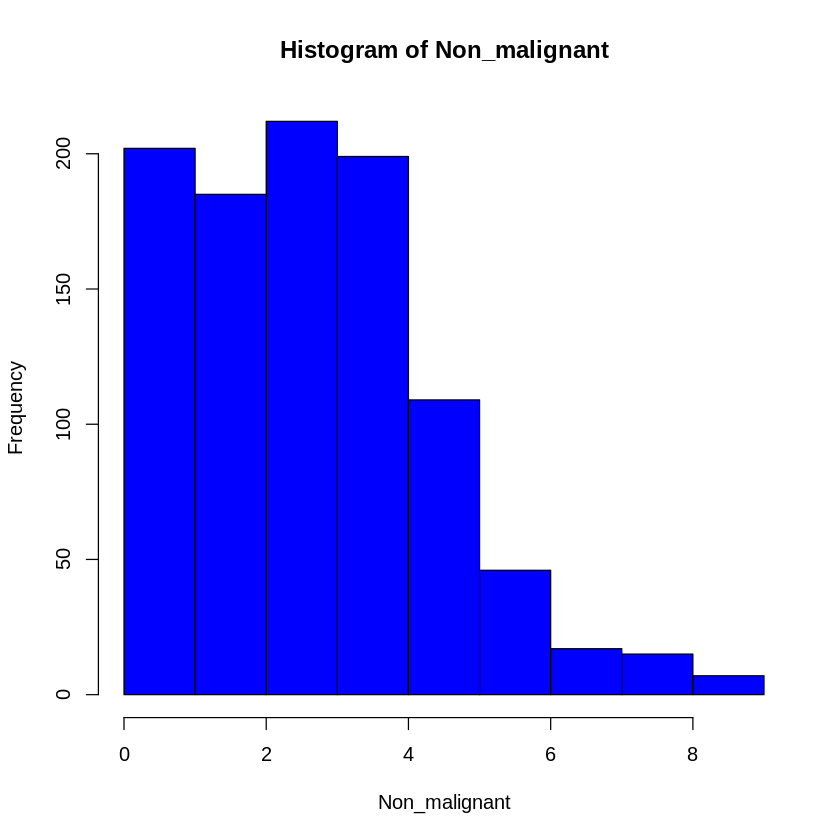

In [ ]:
#Extract the sample
Non_malignant <- as.matrix(log_df[ 1 ])

#Draw histogram
hist(Non_malignant, col= "blue" )


This R code extracts the expression values for the first sample (Non_malignant) from the log_df data frame (containing log-transformed FPKM values). It then draws a histogram for this sample using the hist function, with the bars colored in blue (col="blue"). The histogram provides a distribution visualization of gene expression values for the specified sample.

## **13.2 Histogram of Claudin-low samples**

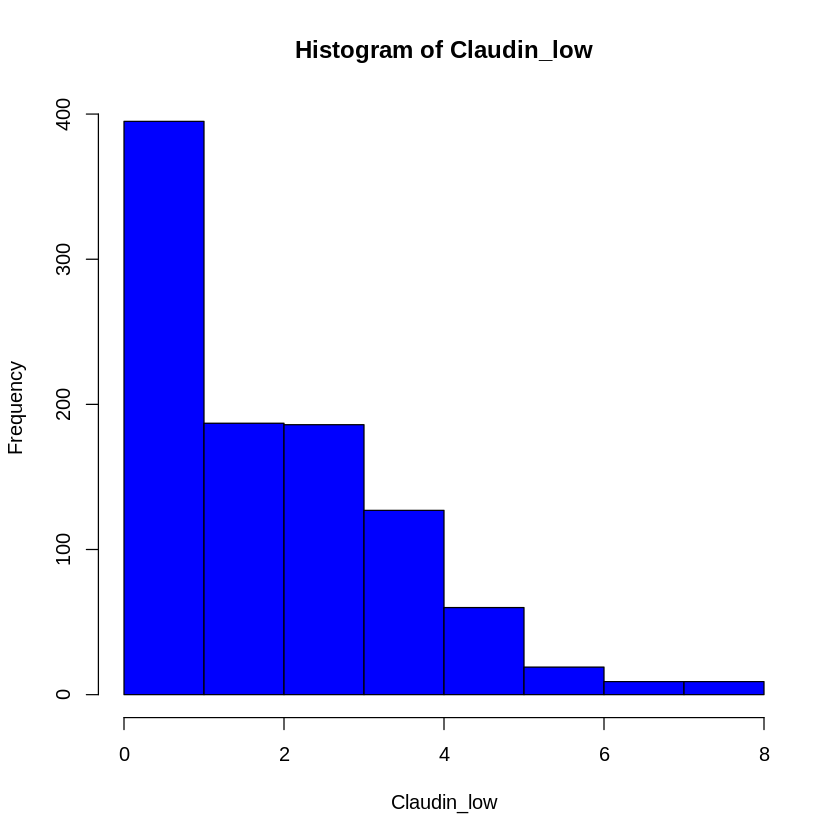

In [ ]:
#Extract sample
Claudin_low <- as.matrix(log_df[6])

#Plot histogram for claudin- low samples
hist(Claudin_low, col="blue")

This R code extracts the expression values for the sixth sample (Claudin_low) from the log_df data frame (containing log-transformed FPKM values). It then draws a histogram for the Claudin-low sample using the hist function, with the bars colored in blue (col="blue"). The histogram provides a distribution visualization of gene expression values for the specified Claudin-low sample.

### **13.3 Overlaying histograms of two samples.**

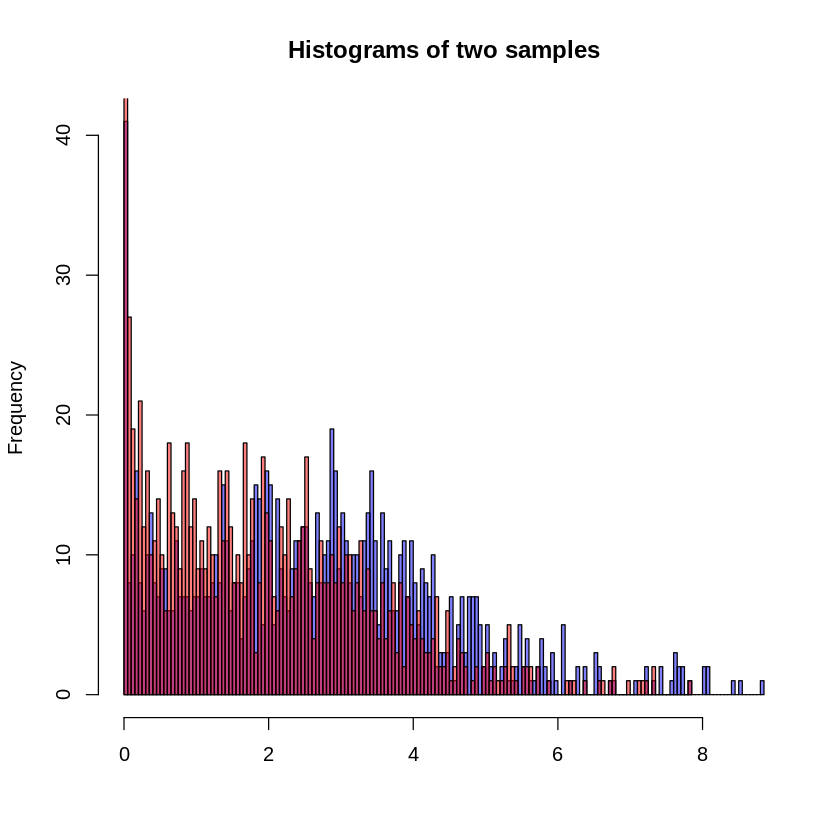

In [ ]:
#Extract desired  samples, here, we are extracting sample 1 and sample 8
sample1 <- log_df1[, 1 ]
sample2 <- log_df1[, 8 ]

#Define colors for histogram
col1 <- rgb( 0 , 0 , 1 , 0.5 )
col2 <- rgb( 1 , 0 , 0 , 0.5 )


#Draw histograms
hist(sample1, col=col1, main = "Histograms of two samples", xlab= "", breaks= 200 )
hist(sample2, col=col2, main= "", xlab= "", breaks= 200 , add=T)


This R code extracts the expression values for the first and eighth samples (sample1 and sample2) from the log_df1 matrix (containing log-transformed FPKM values). It defines two colors (col1 and col2) for the histograms, and then draws histograms for both samples using the hist function. The resulting histograms are overlaid on the same plot, with the main title set to "Histograms of two samples" and common x-axis label, creating a visual comparison of the gene expression distributions between the two selected samples.

## **14. Density Plot**

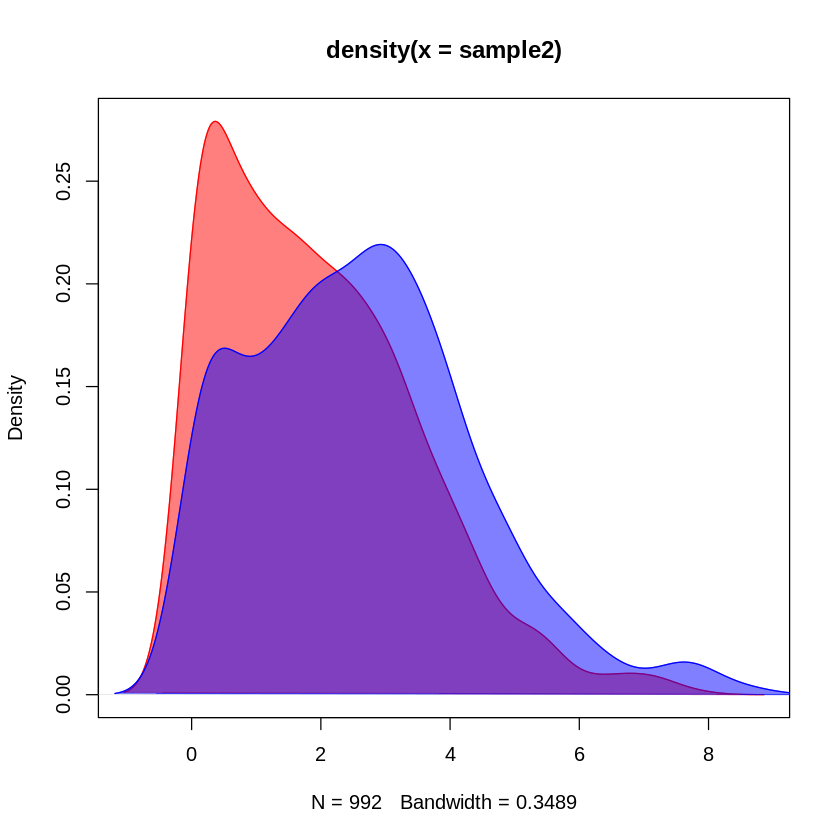

In [ ]:
#Add density for each sample
d1 <- density(sample1)
d2 <- density(sample2)

#Plot Density plot
plot(d2, col="red")
polygon(d2, col=col2, border=col2)
lines(d1, col="blue" )
polygon(d1, col=col1, border=col1)


This R code adds density plots for each of the two samples (sample1 and sample2) to the existing plot. It uses the density function to calculate density estimates (d1 and d2) for each sample and then plots these densities using the plot and lines functions. The polygon function is used to fill the areas under the density curves with the specified colors (col1 and col2). This creates a combined histogram and density plot, providing a more detailed visualization of the gene expression distributions for the two selected samples.

## **15. Heatmap**

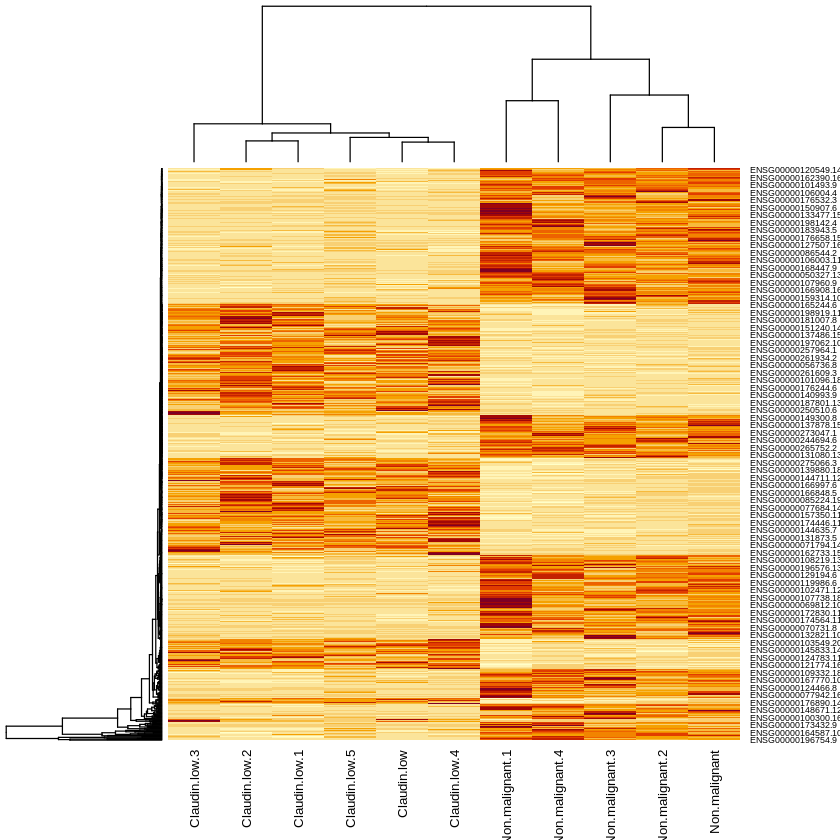

In [ ]:
# Transform dataframe into a matrix
df_mat <- as.matrix(df1)
#Create heatmap
heatmap(df_mat, cexCol= 0.8 )


This R code transforms the data frame df1 into a matrix (df_mat) and then generates a heatmap using the heatmap function. The cexCol parameter is set to 0.8 to adjust the size of the column labels in the heatmap, providing a visual representation of the expression patterns for genes and samples in the dataset.

### **15.1. HeatMap of transformed data**

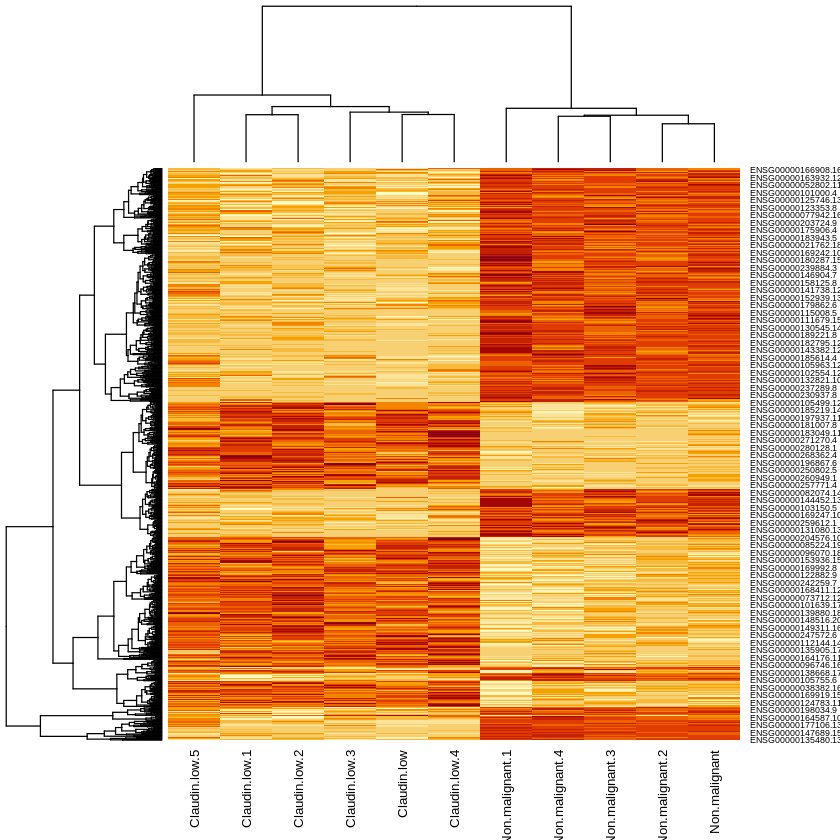

In [ ]:
#Convert into a matrix
df_log_mat <- as.matrix(log_df)

#Plot heatmap
heatmap(df_log_mat, cexCol= 0.8)


This R code converts the data frame log_df with log-transformed FPKM values into a matrix (df_log_mat) and then creates a heatmap using the heatmap function. The cexCol parameter is set to 0.8 to adjust the size of the column labels in the heatmap, providing a visual representation of the expression patterns for genes and samples in the log-transformed dataset.

## **16. Data visualization using GGPLOT2**

### **16.1. Load libraries**

In [ ]:
#Load libraries
library(ggplot2)
install.packages("reshape2")
library(reshape2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



This R code first loads the "ggplot2" library, a powerful tool for creating diverse and complex plots. It then checks if the "reshape2" package is installed; if not, it installs the package from CRAN. Finally, the code loads the "reshape2" library, which is particularly useful for reshaping and transforming data, facilitating efficient data manipulation and visualization.

### **16.2. Boxplot using ggplot**

In [ ]:
#Change the dataframe into long data frame format (which will be used by ggplot)
df_f<- melt(df1)

ERROR: Error in melt(df1): could not find function "melt"



This R code utilizes the melt function from the "reshape2" package to transform the original dataframe df1 into a long format suitable for use with ggplot. The resulting df_f will have a format that is often more convenient for plotting and analysis using ggplot2.

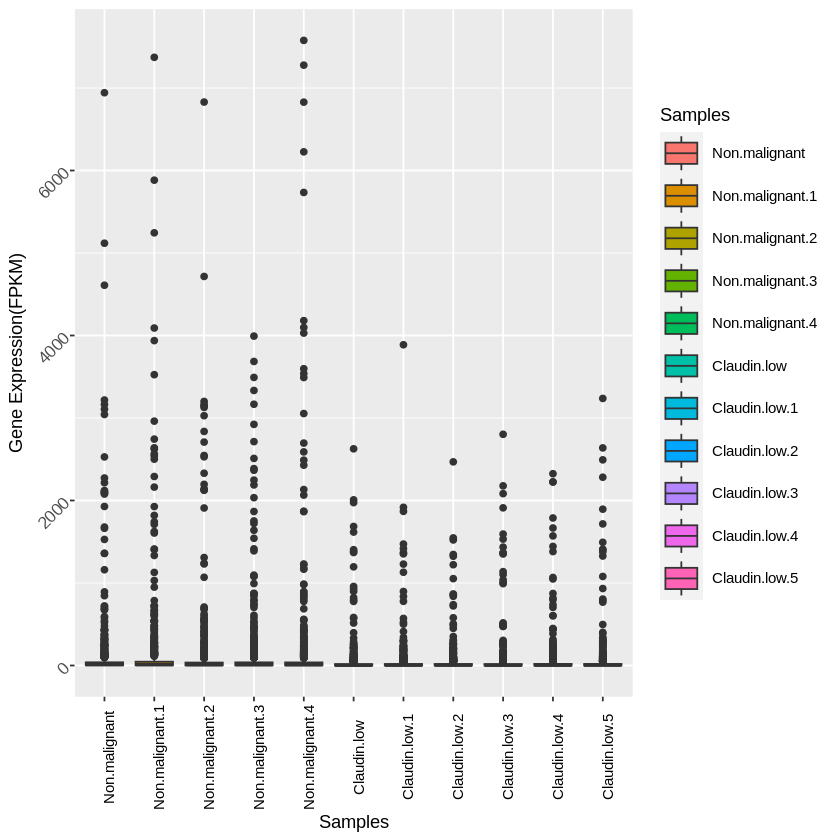

In [ ]:
#Draw Boxplot using ggplot function
b <- ggplot(df_f, aes(factor(variable), value)) + geom_boxplot(aes(fill = variable))

#Add axis title, legend title and adjust font size
b + theme(legend.key.size = unit(0.9, "cm"), legend.text = element_text(color= "Black", size= 9), axis.text.x = element_text(color= "Black", size= 9, angle= 90), axis.text.y = element_text(size= 10, angle= 45)) + xlab("Samples") + ylab("Gene Expression(FPKM)") + labs(fill = "Samples")


This R code employs the ggplot function to create a boxplot from the long-format dataframe df_f. It uses aesthetics to map the variable (samples) to the x-axis and gene expression values to the y-axis, with fill colors representing different samples. Additional themes and annotations are applied to enhance the plot, including adjustments to legend size, font color, and size for better readability. The x-axis is labeled as "Samples," the y-axis as "Gene Expression (FPKM)," and the legend as "Samples."

### **16.3. Boxplot for transformed data using ggplot**

In [ ]:
# Reshape or transform data into a long data frame format
df_log <- melt(log_df)

No id variables; using all as measure variables




This R code utilizes the melt function to transform the log-transformed dataframe log_df into a long data frame format (df_log). This format is often more conducive for data analysis and visualization tasks using tools like ggplot2.

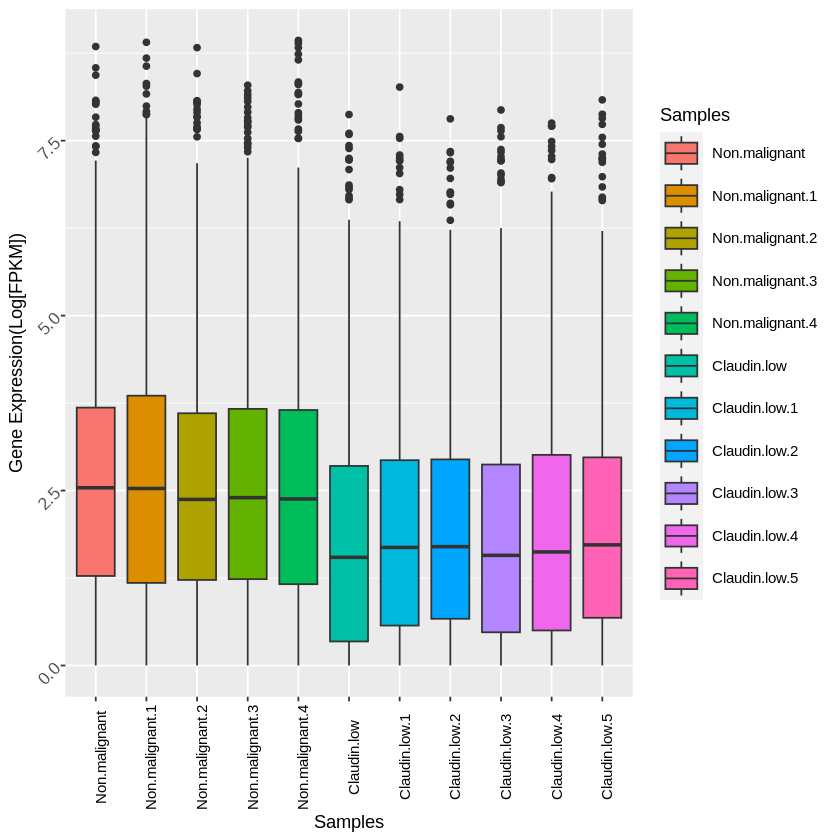

In [ ]:
#Draw boxplot
p <- ggplot(df_log, aes(factor(variable), value))  + geom_boxplot(aes(fill = variable))

#Add axis title, legend title and adjust font size
p + theme(legend.key.size = unit(0.9 , "cm"), legend.text = element_text(color= "Black", size= 9), axis.text.x = element_text( color= "Black", size= 9, angle= 90), axis.text.y = element_text(size= 10, angle= 45)) + xlab("Samples") + ylab("Gene Expression(Log[FPKM])" ) + labs(fill = "Samples")

### **16.4. Boxplot for groups using ggplot**

In [ ]:
#Create a long formatted dataframe
df_group <- melt(group)
head(df_group)

,Var1,Var2,value
,<fct>,<fct>,<dbl>
1,ENSG00000131746.11,Non-malignant,5.953615
2,ENSG00000065618.15,Non-malignant,5.743215
3,ENSG00000128422.14,Non-malignant,8.116991
4,ENSG00000111319.11,Non-malignant,5.251266
5,ENSG00000189334.7,Non-malignant,6.462925
6,ENSG00000076826.8,Non-malignant,2.280086



This R code employs the melt function to transform the "group" data frame into a long-formatted data frame named df_group. The resulting data frame is displayed using the head function, providing a glimpse of its structure and the first few rows.

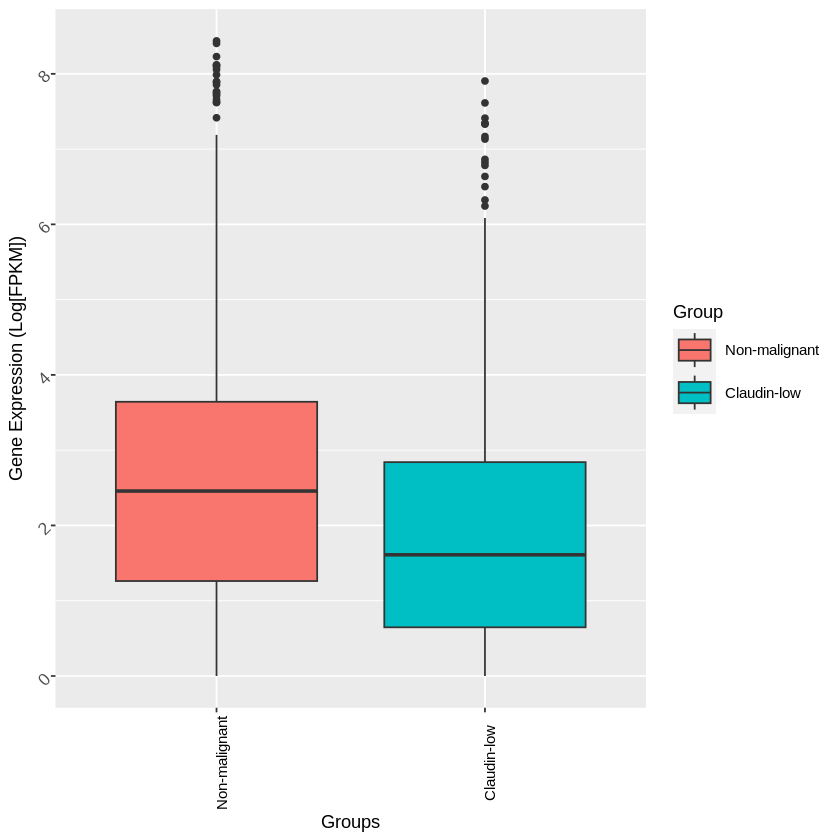

In [ ]:
#Draw boxplot
pp <- ggplot(df_group, aes(factor(Var2), value)) + geom_boxplot(aes(fill = Var2))

#Add axis title, legend title and adjust font size
pp + theme(legend.key.size = unit(0.9, "cm"), legend.text = element_text(color= "Black", size= 9), axis.text.x= element_text(color= "Black" , size= 9, angle=90), axis.text.y = element_text(size= 10 , angle= 45)) + xlab("Groups") + ylab("Gene Expression (Log[FPKM])") + labs(fill = "Group")


This R code uses the ggplot function to create a boxplot from the long-formatted dataframe df_group. It maps the grouping variable (Var2) to the x-axis, gene expression values (value) to the y-axis, and uses fill colors to distinguish between groups. Additional adjustments, such as modifying legend and axis properties, are made to enhance the clarity and aesthetics of the plot. The x-axis is labeled as "Groups," the y-axis as "Gene Expression (Log[FPKM])," and the legend as "Group."